### AXA Assessment - To predict claims of the hold out dataset.

By Nazia Ferdause Sodial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_train.csv')
df.head()

,target,vehicle_age,vehicle_value,vehicle_power,ph_age,licence_years,licence_points,ph_owns_home,annual_mileage
0,2279.692531,1,8293.0,68.0,42,10,0,1.0,12000
1,2000.064298,6,7087.0,51.0,45,15,3,0.0,8000
2,2012.707571,0,9045.0,60.0,61,24,0,0.0,1000
3,2763.597247,3,10805.0,98.0,48,17,3,0.0,10000
4,2096.998879,4,12447.0,82.0,62,20,0,1.0,11000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          5228 non-null   float64
 1   vehicle_age     5228 non-null   int64  
 2   vehicle_value   5180 non-null   float64
 3   vehicle_power   5169 non-null   float64
 4   ph_age          5228 non-null   int64  
 5   licence_years   5228 non-null   int64  
 6   licence_points  5228 non-null   int64  
 7   ph_owns_home    5165 non-null   float64
 8   annual_mileage  5228 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 367.7 KB


In [4]:
Null_cells = df.isnull().sum() # Looking for null values
Null_cells

target             0
vehicle_age        0
vehicle_value     48
vehicle_power     59
ph_age             0
licence_years      0
licence_points     0
ph_owns_home      63
annual_mileage     0
dtype: int64

Analysing the effect of mean and median on the missing values of the dataset.

Text(0.5, 1.0, 'Imputed with the median')

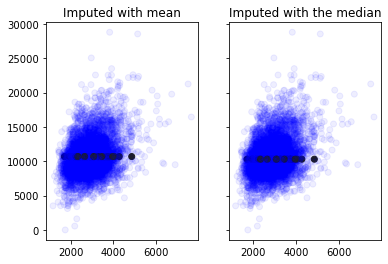

In [5]:
Vehicle_Value_mean = df['vehicle_value'].fillna(df['vehicle_value'].mean()) # source code - Lab assignment feedback
Claims = df['target']
Vehicle_Value_median = df['vehicle_value'].fillna(df['vehicle_value'].median())

# This step will identify rows with atleast one NaN values
atLeastOneNaN = df['vehicle_value'].isnull() | df['target'].isnull()

# Specifing black for imputed values
colourPalette = {True: '#1E1E1E', False: '#0000ff11'}
colours = atLeastOneNaN.map(colourPalette)

#Subplots of one row and two columns, which share a y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# imputing with mean values
ax1.scatter(Claims, Vehicle_Value_mean, c=colours)
ax1.set_title('Imputed with mean')
# imputing with median values
ax2.scatter(Claims, Vehicle_Value_median, c=colours)
ax2.set_title('Imputed with the median')

Text(0.5, 1.0, 'Imputed with the median')

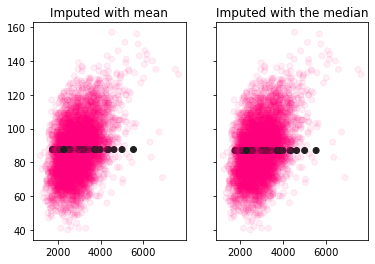

In [6]:
Vehicle_power_mean = df['vehicle_power'].fillna(df['vehicle_power'].mean()) # source code - Lab assignment feedback
Claims = df['target']
Vehicle_power_median = df['vehicle_power'].fillna(df['vehicle_power'].median())

# This step will identify rows with atleast one NaN values
atLeastOneNaN_1 = df['vehicle_power'].isnull() | df['target'].isnull()

# Specifing black for imputed values
colourPalette = {True: '#1E1E1E', False: '#ff007c11'}
colours = atLeastOneNaN_1.map(colourPalette)

#Subplots of one row and two columns, which share a y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# imputing with mean values
ax1.scatter(Claims, Vehicle_power_mean, c=colours)
ax1.set_title('Imputed with mean')
# imputing with median values
ax2.scatter(Claims, Vehicle_power_median, c=colours)
ax2.set_title('Imputed with the median')

In [7]:
df['vehicle_value'] = df['vehicle_value'].fillna(df['vehicle_value'].mean())
df['vehicle_power'] = df['vehicle_power'].fillna(df['vehicle_power'].mean())


In [8]:
df['ph_owns_home'] = df['ph_owns_home'].fillna(df['ph_owns_home'].mode()[0])

In [9]:
Null_cells_1 = df.isnull().sum() # Looking for null values
Null_cells_1

target            0
vehicle_age       0
vehicle_value     0
vehicle_power     0
ph_age            0
licence_years     0
licence_points    0
ph_owns_home      0
annual_mileage    0
dtype: int64

Basic Statistics

In [111]:
df.describe()

,target,vehicle_age,vehicle_value,vehicle_power,ph_age,licence_years,licence_points,ph_owns_home,annual_mileage
count,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.00000,5228.000000
mean,2945.278804,3.419663,10679.816795,87.583865,47.285195,15.094109,0.846404,0.53749,7247.895945
std,725.568031,2.792391,2703.043672,16.112966,8.674323,3.808444,1.483901,0.49864,3053.089553
min,1176.736657,0.000000,0.000000,40.000000,18.000000,0.000000,0.000000,0.00000,1000.000000
25%,2417.346225,1.000000,8919.000000,76.000000,42.000000,13.000000,0.000000,0.00000,5000.000000
50%,2900.642991,3.000000,10324.000000,87.000000,47.000000,15.000000,0.000000,1.00000,7000.000000
75%,3395.995168,5.000000,12017.500000,98.000000,53.000000,18.000000,3.000000,1.00000,10000.000000
max,7657.830767,24.000000,28776.000000,157.000000,77.000000,30.000000,6.000000,1.00000,15000.000000


Distribution of the data

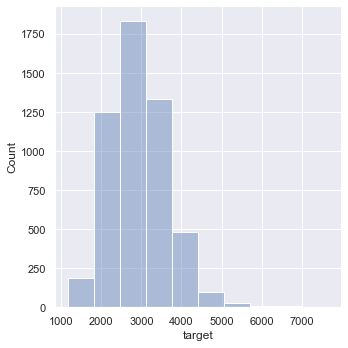

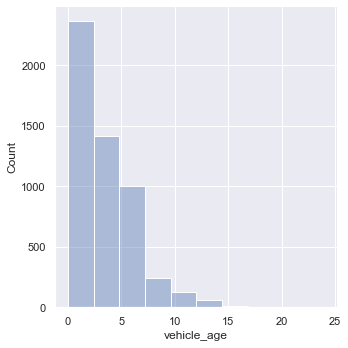

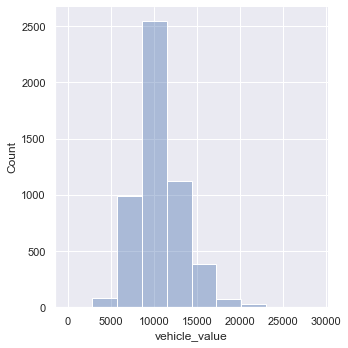

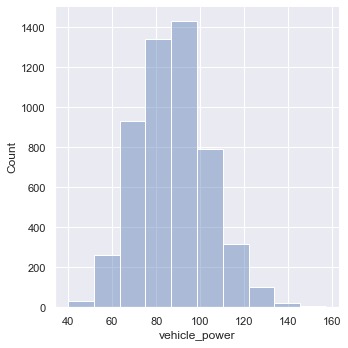

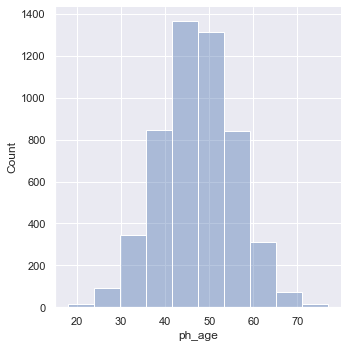

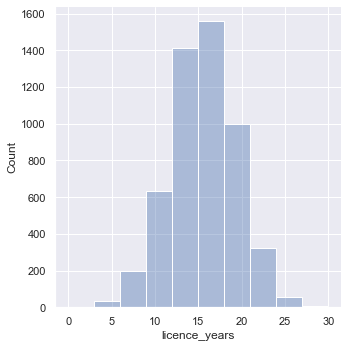

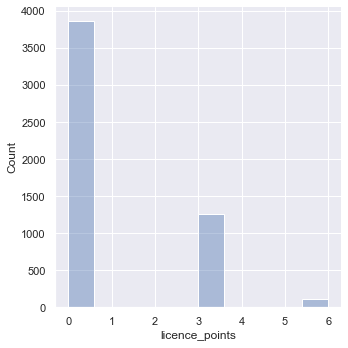

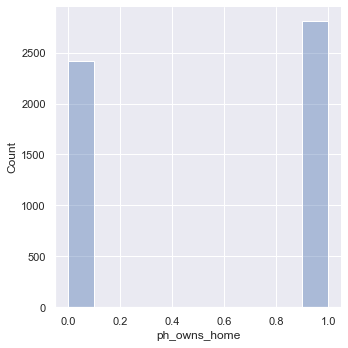

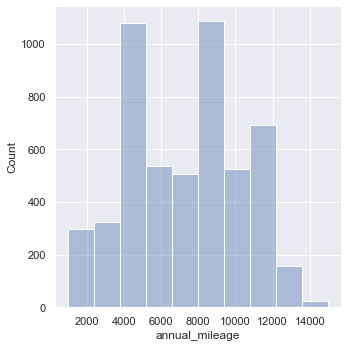

In [110]:
for i in df.columns:
    sns.displot(df,x=i, bins = 10, alpha = 0.4)

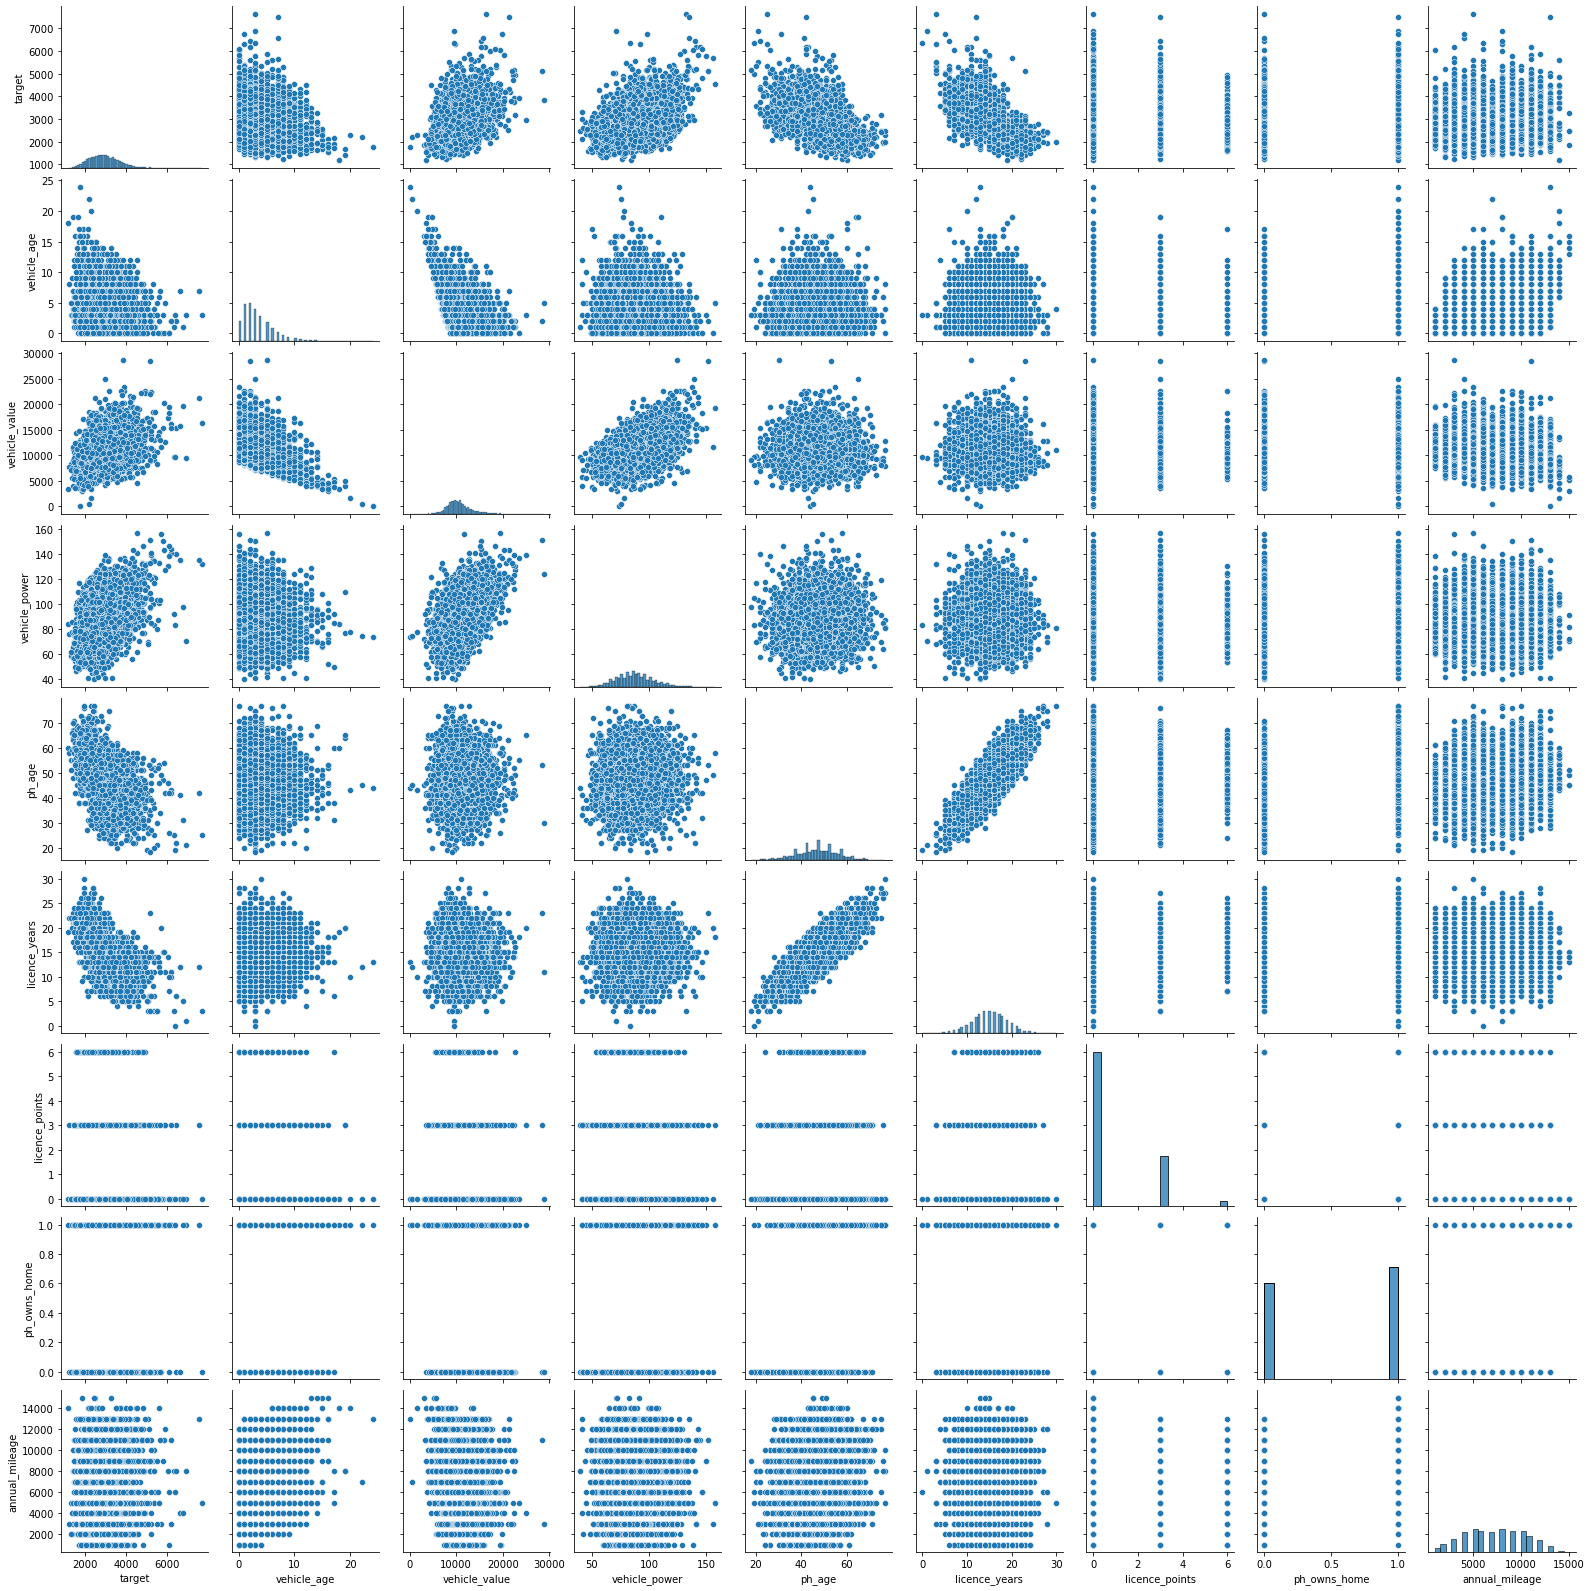

In [10]:
sns.pairplot(df)

License years, customer age, vehicle power and vehicle value have slight linear relationship with the target variable.

In [11]:
df_Corr = df.corr() # Correlation matrix
df_Corr

,target,vehicle_age,vehicle_value,vehicle_power,ph_age,licence_years,licence_points,ph_owns_home,annual_mileage
target,1.000000,-0.117652,0.315942,0.404781,-0.553554,-0.642370,-0.023184,-0.008263,0.078686
vehicle_age,-0.117652,1.000000,-0.434280,-0.049770,0.005294,-0.005262,-0.001247,0.005873,0.178337
vehicle_value,0.315942,-0.434280,1.000000,0.460483,0.009427,0.004538,0.018077,0.021087,-0.067643
vehicle_power,0.404781,-0.049770,0.460483,1.000000,0.025797,0.011003,-0.003313,0.024602,0.010317
ph_age,-0.553554,0.005294,0.009427,0.025797,1.000000,0.844891,0.009379,0.394300,0.133660
licence_years,-0.642370,-0.005262,0.004538,0.011003,0.844891,1.000000,0.040338,0.000862,0.016750
licence_points,-0.023184,-0.001247,0.018077,-0.003313,0.009379,0.040338,1.000000,-0.054916,-0.018071
ph_owns_home,-0.008263,0.005873,0.021087,0.024602,0.394300,0.000862,-0.054916,1.000000,0.286321
annual_mileage,0.078686,0.178337,-0.067643,0.010317,0.133660,0.016750,-0.018071,0.286321,1.000000


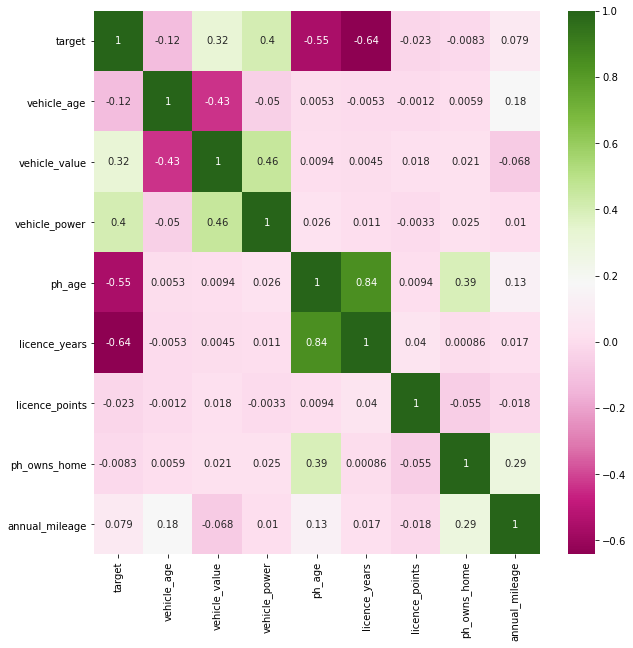

In [12]:
plt.subplots(figsize=(10,10))
Heat_map = sns.heatmap(df_Corr, cmap="PiYG", annot=True) # Heatmap of correlation matrix
plt.show()

License years and customer age are negative linearly correlated to the target variable. The two pairs - Vehicle value - vehicle age and vehicle value - vehicle power are slightly correlated to each other.

In [13]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

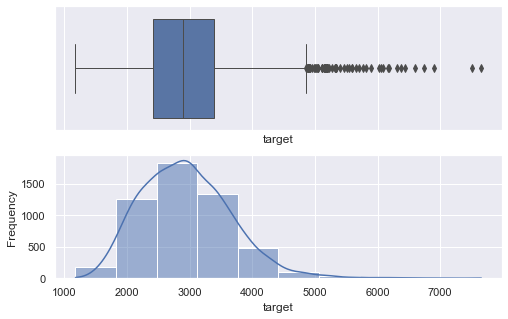

<Figure size 576x360 with 0 Axes>

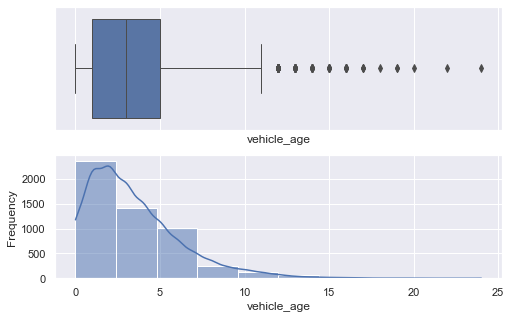

<Figure size 576x360 with 0 Axes>

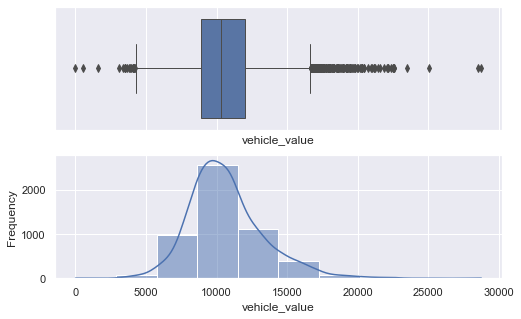

<Figure size 576x360 with 0 Axes>

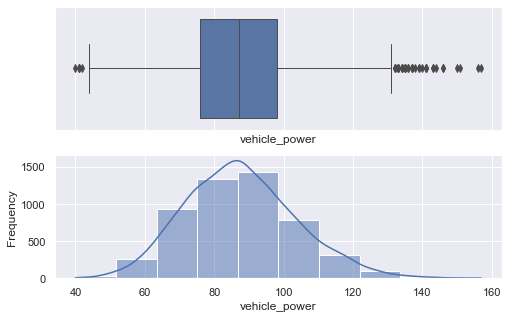

<Figure size 576x360 with 0 Axes>

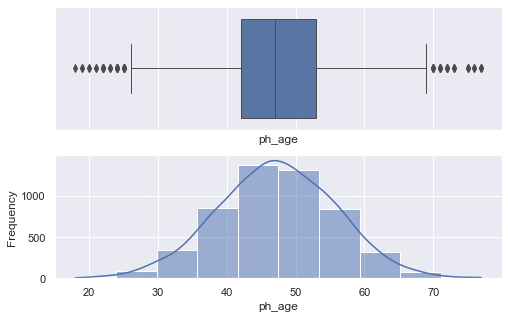

<Figure size 576x360 with 0 Axes>

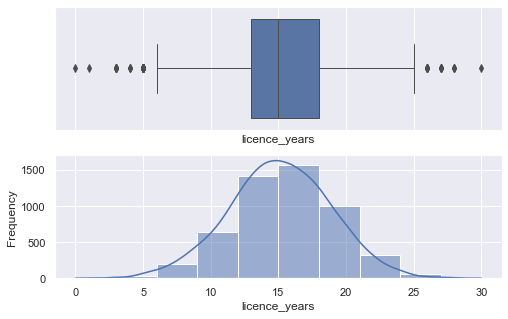

<Figure size 576x360 with 0 Axes>

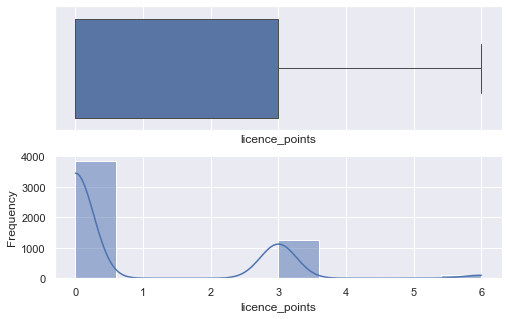

<Figure size 576x360 with 0 Axes>

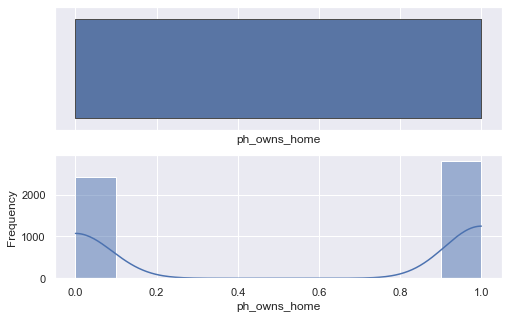

<Figure size 576x360 with 0 Axes>

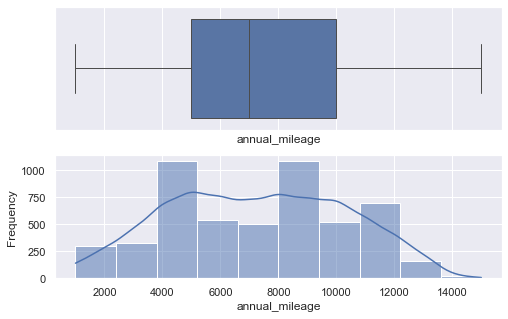

In [14]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

Due to lack of data points I haven't removed outliers.

Sacling the data for linear regression

In [112]:
df_backup = df.copy()

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_backup[['target', 'ph_age','licence_years']] = sc.fit_transform(df_backup[['target', 'ph_age','licence_years']])
df_backup

,target,vehicle_age,vehicle_value,vehicle_power,ph_age,licence_years,licence_points,ph_owns_home,annual_mileage
0,-0.917419,1,8293.0,68.0,-0.609350,-1.337711,0,1.0,12000
1,-1.302848,6,7087.0,51.0,-0.263469,-0.024713,3,0.0,8000
2,-1.285421,0,9045.0,60.0,1.581232,2.338683,0,0.0,1000
3,-0.250423,3,10805.0,98.0,0.082413,0.500486,3,0.0,10000
4,-1.169237,4,12447.0,82.0,1.696526,1.288285,0,1.0,11000
...,...,...,...,...,...,...,...,...,...
5223,0.678469,2,13311.0,82.0,-0.263469,-0.812511,0,1.0,9000
5224,1.541687,0,11414.0,93.0,-1.762288,-1.075111,0,0.0,1000
5225,-0.870193,3,7536.0,75.0,0.082413,0.500486,0,0.0,4000
5226,1.795212,2,10439.0,90.0,-0.609350,-0.287312,3,0.0,6000


In [119]:
df_scaled = df_backup[['target', 'ph_age','licence_years']]

### Linear Regression

Assumptions for Linear Regression:
1. The dependent and independent variables are linearly correlated.
2. Multicollinearity is absent.
3. Homoskedasticity is present.
4. The data has normal distribution.

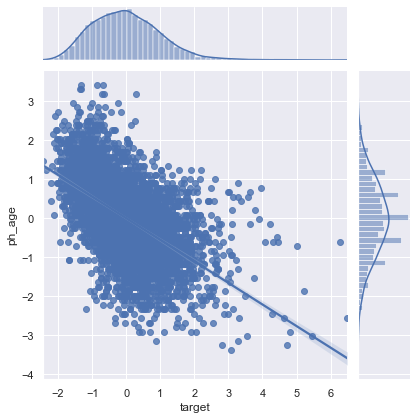

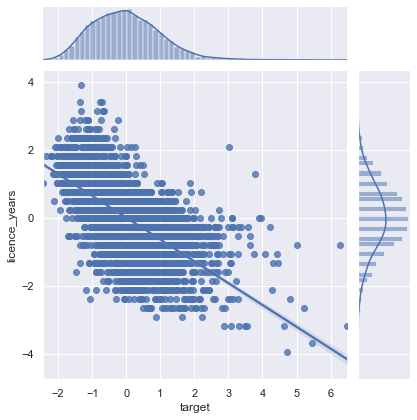

In [120]:
sns.jointplot(data=df_scaled, x="target", y="ph_age", kind = "reg")
sns.jointplot(data=df_scaled, x="target", y="licence_years", kind = "reg")

In [121]:
train = df_scaled.sample(frac=0.20)

In [122]:
import statsmodels.formula.api as smf
model = smf.ols(formula='target ~ ph_age + licence_years', data=train)

In [123]:
results = model.fit()
# Printing the summary page
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.21e-118
Time:                        09:11:58   Log-Likelihood:                -1213.1
No. Observations:                1046   AIC:                             2432.
Df Residuals:                    1043   BIC:                             2447.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0295      0.024      1.235

As per the performance metrics, the model performance is very poor.

Checking for homoskedasticity.

In [124]:
residualshat =results.resid

In [125]:
x_train = train.drop('target', axis = 1)

In [126]:
import statsmodels.stats.api as sms  
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residualshat, x_train)
lzip(name, test)

[('F statistic', 1.062160808551088), ('p-value', 0.24576885574729174)]

The null hypothesis for the GQ test is homoskedasticity. The larger the F-statistic, the more evidence you’ll have against the homoskedasticity assumption and the more likely you have heteroskedasticity (different variance for the two groups). The given P-value above tells us how far we are from the alpha level of 0.05. So the heteroscedasticity can also be confirmed using this test. In such cases, it is also possible to use a different alpha values to suit the needs of experimenter.

This is definitely not an ideal algorithm. Keeping in mind the time, I decided not to continue with this algorithm and move to more robust algorithms.

### Some reuseable functions:

In [15]:
def plot_feature_importances_tree(model, x):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index= x.columns)
    fig, ax = plt.subplots(figsize=(20,10))
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

In [16]:
def evaluate_model(model, x, y):
    scores = cross_val_score(model, x, y, scoring = 'r2', cv=5)
    score = scores.mean()
    return score

In [17]:
#from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
def get_best_hyperparameters(model, params, cv_value , X_train, y_train ): 
    search = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1, verbose=1,cv=cv_value) 
    search.fit(X_train, y_train)  
    print("Best Accuracy    :",  search.best_score_) 
    print("Best Parameters  : ", search.best_params_)
    print("Best Estimators : ",  search.best_estimator_)  
    best_grid = search.best_estimator_
    return best_grid

In [18]:
def get_regressor_predictions_results(regressor, X_train, y_train, X_test):  
    regressor.fit(X_train,y_train)
    y_pred_test = regressor.predict(X_test)
    return y_pred_test

In [19]:
from sklearn.inspection import permutation_importance
# def tree_featuresndpermutation_importance(clf, X_train, y_train):
#     result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
#     perm_sorted_idx = result.importances_mean.argsort()

#     tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
#     tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
#     ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
#     ax1.set_yticks(tree_indices)
#     ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
#     ax1.set_ylim((0, len(clf.feature_importances_)))
#     ax2.boxplot(
#         result.importances[perm_sorted_idx].T,
#         vert=False,
#         labels=X_train.columns[perm_sorted_idx],
#     )
#     plt.title()
#     fig.tight_layout()
#     plt.show()

In [20]:
def importance(reg, X_val, y_val):
    feature_importance = reg.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(1, 2, 1)
    plt.barh(pos, feature_importance[sorted_idx], align="center")
    plt.yticks(pos, np.array(X_val.columns)[sorted_idx])
    plt.title("Feature Importance (MDI)")

    result = permutation_importance(
        reg, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2
    )
    sorted_idx = result.importances_mean.argsort()
    plt.subplot(1, 2, 2)
    plt.boxplot(
        result.importances[sorted_idx].T,
        vert=False,
        labels=np.array(X_val.columns)[sorted_idx],
    )
    plt.title("Permutation Importance (test set)")
    fig.tight_layout()
    plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def print_regressor_scores(X_test, y_test, y_pred_test):
    
    # store regressor scores for Test Dataset
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_score_test = r2_score(y_test, y_pred_test)
    adj_r_sq_test = 1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    # print regressor scores for Test Dataset 
    print('MAE for test set is {}'.format(MAE_test))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('R squared score for test set is {}'.format(r2_score_test))
    print('Adjusted R squared score for testing set is {}'.format(adj_r_sq_test))

    df_model_performance = dict({'MAE' : MAE_test, 'RMSE' : RMSE_test, 'R2 Score' : r2_score_test, 'Adjusted R2 Score' :adj_r_sq_test})
    return df_model_performance

Seperated the dependent and independent variables

In [22]:
X = df.drop('target', axis = 1)

In [23]:
X;

In [24]:
Y = df[['target']]

In [25]:
Y;

Splitting the data into train, validation and test data.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_t, X_test, Y_t, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.2, random_state=42)

In [29]:
# df_model=df_model.append(df_model_performance1,ignore_index=True )
# df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)

##### Tree models are towards missing values, outliers and scaling. However, since I already imputed missing values I will go ahead with it.

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor


Baseline Model

In [31]:
Model_RF = RandomForestRegressor(random_state=0)

In [32]:
Model_RF.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

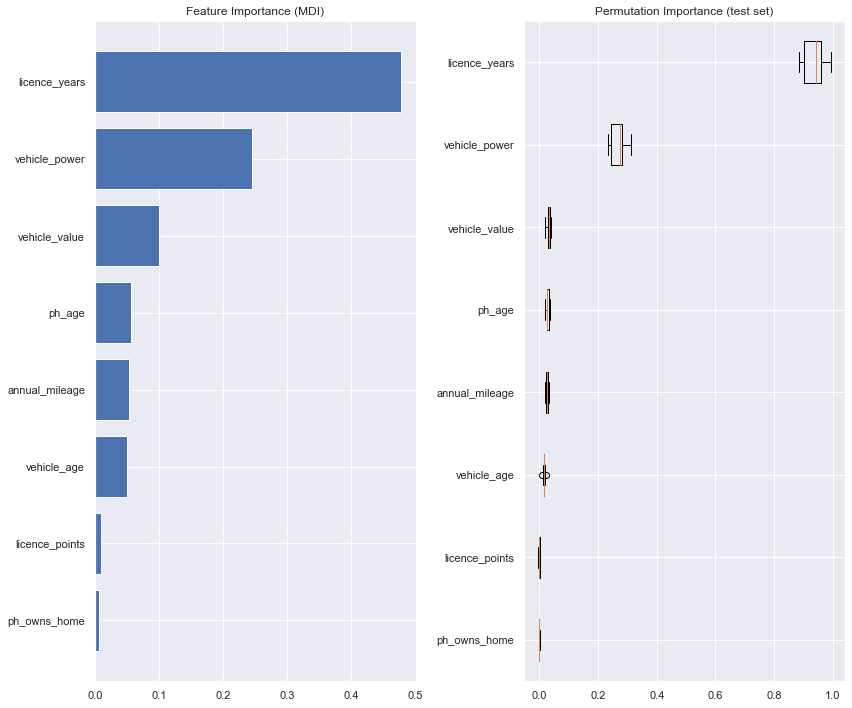

In [33]:
importance(Model_RF,X_val,Y_val)

License_years and Vehicle_power seem to be the most important features and ph_owns_home the least.

In [34]:
Y_val

,target
1089,2257.764811
2223,3424.362885
4871,1630.937540
4329,2856.535424
2912,2260.207829
...,...
4036,3022.353534
3411,3431.551011
3065,2401.829211
1640,1948.179979


In [35]:
y_pred_valid = Model_RF.predict(X_val)

In [36]:
print_regressor_scores(X_val,Y_val,y_pred_valid)

MAE for test set is 321.8368832377017
RMSE for test set is 430.2529614027979
R squared score for test set is 0.6655757605716582
Adjusted R squared score for testing set is 0.6623446084998867


{'MAE': 321.8368832377017,
 'RMSE': 430.2529614027979,
 'R2 Score': 0.6655757605716582,
 'Adjusted R2 Score': 0.6623446084998867}

In [40]:
n_estimators = [10, 30, 50, 80, 100, 150, 200, 250]

# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)


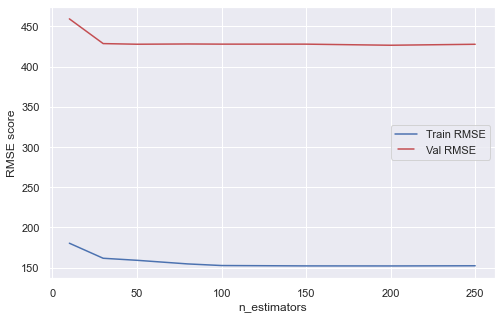

In [41]:
trees = [10, 30, 50, 80, 100, 150, 200, 250]
train_results = []
Val_results = []
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
    train_results.append(RMSE_train)
    Val_pred = rf.predict(X_val)
    RMSE_val = np.sqrt(mean_squared_error(Y_val, Val_pred))
    Val_results.append(RMSE_val)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, Val_results, 'r', label='Val RMSE')
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()


From the above plot it can be observed that after 100 trees, the model starts to overfit as the loss for train set keeps decreasing but for validation set it doesn't.

Hyperparameter tuning

In [42]:
Model_RF_GD = RandomForestRegressor()

In [43]:
n_estimators_list = list(range(100,150,50))
criterion_list = ['squared_error', 'absolute_error']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2', None]

params = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

In [44]:
X_train_RF = X_train[['licence_years','vehicle_power']]

In [45]:
X_val_RF = X_val[['licence_years','vehicle_power']]

In [46]:
cv_value = 3

In [47]:
%time get_best_hyperparameters(Model_RF_GD, params, cv_value , X_train_RF, Y_train )

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Accuracy    : 0.6249521862796313
Best Parameters  :  {'n_estimators': 100, 'min_samples_split': 0.015, 'min_samples_leaf': 0.005, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'squared_error'}
Best Estimators :  RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=0.005,
                      min_samples_split=0.015)
Wall time: 6.2 s


RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=0.005,
                      min_samples_split=0.015)

In [50]:
Model_RF_Final = RandomForestRegressor(n_estimators= 100, min_samples_split= 0.015, 
                                       min_samples_leaf= 0.005, max_features= 'sqrt', 
                                       max_depth= 15, criterion= 'squared_error')

Fitted the model using the parameters except - vehicle_power and license_years

In [51]:
Model_RF_Final.fit(X_train_RF, Y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=0.005,
                      min_samples_split=0.015)

In [52]:
y_pred_validation = Model_RF_Final.predict(X_val_RF)

In [53]:
print_regressor_scores(X_val,Y_val,y_pred_validation)

MAE for test set is 332.3484922529197
RMSE for test set is 453.2694199833478
R squared score for test set is 0.6288385591867752
Adjusted R squared score for testing set is 0.6252524583093528


{'MAE': 332.3484922529197,
 'RMSE': 453.2694199833478,
 'R2 Score': 0.6288385591867752,
 'Adjusted R2 Score': 0.6252524583093528}

In [54]:
Model_RF_Final.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=0.005,
                      min_samples_split=0.015)

In [55]:
y_pred_validation_all = Model_RF_Final.predict(X_val)

In [56]:
print_regressor_scores(X_val,Y_val,y_pred_validation_all)

MAE for test set is 331.26720998211226
RMSE for test set is 459.47349392518527
R squared score for test set is 0.6186085635901806
Adjusted R squared score for testing set is 0.6149236221755929


{'MAE': 331.26720998211226,
 'RMSE': 459.47349392518527,
 'R2 Score': 0.6186085635901806,
 'Adjusted R2 Score': 0.6149236221755929}

In [58]:
X_train_RF_1 = X_train.drop('ph_owns_home',axis = 1)

In [59]:
X_val_RF_1 = X_val.drop('ph_owns_home',axis = 1)

Fitted the model using all the parameters except - ph_owns_home

In [62]:
Model_RF_Final.fit(X_train_RF_1, Y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=0.005,
                      min_samples_split=0.015)

In [64]:
y_pred_validation_few = Model_RF_Final.predict(X_val_RF_1)

In [65]:
print_regressor_scores(X_val_RF_1,Y_val,y_pred_validation_few)

MAE for test set is 329.1113369964525
RMSE for test set is 455.66478913737745
R squared score for test set is 0.624905278738159
Adjusted R squared score for testing set is 0.6217380132992774


{'MAE': 329.1113369964525,
 'RMSE': 455.66478913737745,
 'R2 Score': 0.624905278738159,
 'Adjusted R2 Score': 0.6217380132992774}

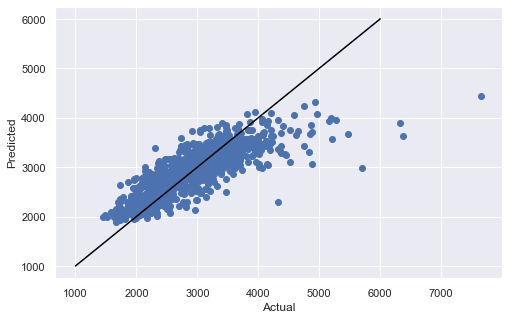

In [66]:
plt.scatter(Y_val,y_pred_validation_few)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot([1000, 6000],[1000,6000],'black')

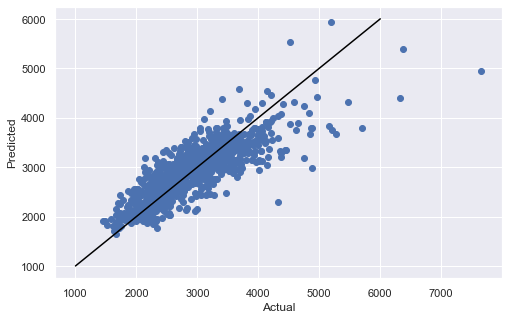

In [67]:
plt.scatter(Y_val,y_pred_valid)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot([1000, 6000],[1000,6000],'black')

### Gadient Boosting

In [68]:
from sklearn import ensemble

Baseline Model

In [69]:
Model_GBM = ensemble.GradientBoostingRegressor()
Model_GBM.fit(X_train, Y_train)

GradientBoostingRegressor()

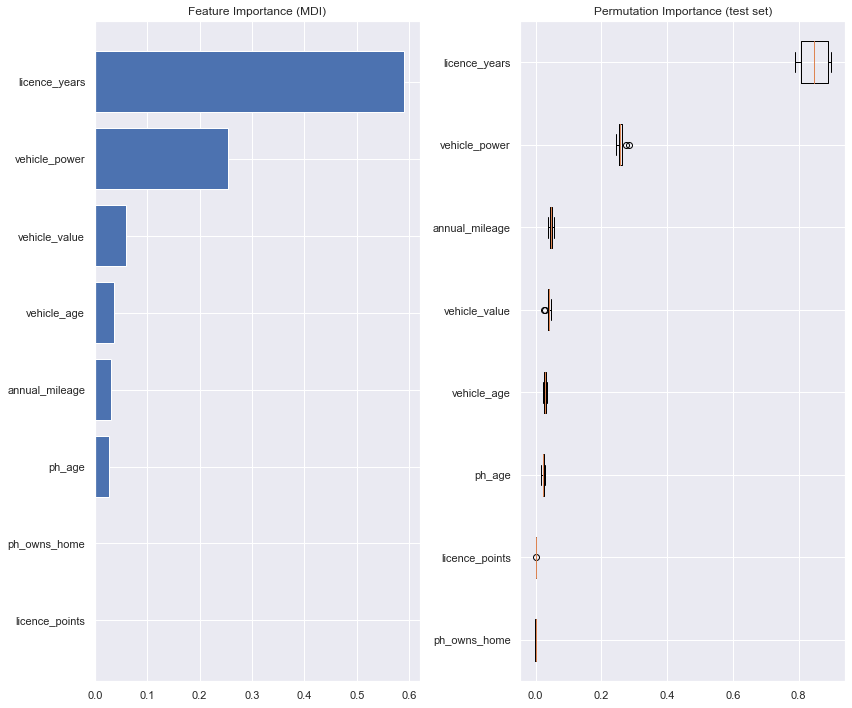

In [70]:
importance(Model_GBM, X_val,Y_val)

License_years and Vehicle_power seem to be the most important features and ph_pwns_home and license_points the least.

In [71]:
y_pred_valGBM = Model_GBM.predict(X_val)

In [72]:
print_regressor_scores(X_val,Y_val,y_pred_valGBM)

MAE for test set is 299.0769900032061
RMSE for test set is 393.2936389380573
R squared score for test set is 0.7205630347565015
Adjusted R squared score for testing set is 0.7178631606961778


{'MAE': 299.0769900032061,
 'RMSE': 393.2936389380573,
 'R2 Score': 0.7205630347565015,
 'Adjusted R2 Score': 0.7178631606961778}

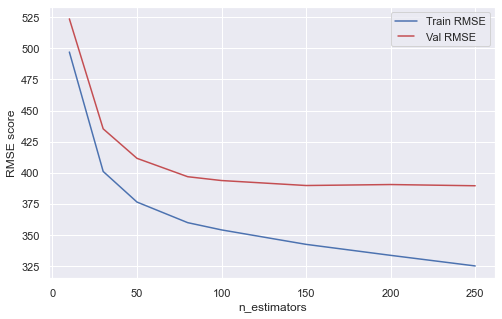

In [74]:
trees = [10, 30, 50, 80, 100, 150, 200, 250]
train_results = []
Val_results = []
for estimator in n_estimators:
    rf = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
    train_results.append(RMSE_train)
    Val_pred = rf.predict(X_val)
    RMSE_val = np.sqrt(mean_squared_error(Y_val, Val_pred))
    Val_results.append(RMSE_val)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, Val_results, 'r', label='Val RMSE')
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()

It is clearly visible from the map that after 100 trees the model starts to overfit.

Fitted the model using 100 trees

In [89]:
Model_GBM_100 = ensemble.GradientBoostingRegressor(n_estimators= 100)
Model_GBM_100.fit(X_train, Y_train)

GradientBoostingRegressor()

In [90]:
y_pred_GBM = Model_GBM_100.predict(X_val)

In [91]:
print_regressor_scores(X_val,Y_val,y_pred_GBM)

MAE for test set is 299.4490631787399
RMSE for test set is 394.9607491232467
R squared score for test set is 0.7181890347627844
Adjusted R squared score for testing set is 0.7154662235044538


{'MAE': 299.4490631787399,
 'RMSE': 394.9607491232467,
 'R2 Score': 0.7181890347627844,
 'Adjusted R2 Score': 0.7154662235044538}

Hyperparameter tuning

In [75]:
n_estimators_list = list(range(100,150,50))
criterion_list = ['squared_error', 'friedman_mse', 'mse']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2', None]
learning_rate = [0.01,0.1,1,10]
early_stop = [1,5,10]

params = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list,
    'learning_rate': learning_rate,
    'n_iter_no_change': early_stop}

In [76]:
cv_value = 3

In [77]:
%time get_best_hyperparameters(Model_GBM, params, cv_value , X_train, Y_train )

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Accuracy    : 0.6659000088021226
Best Parameters  :  {'n_iter_no_change': 5, 'n_estimators': 100, 'min_samples_split': 0.025, 'min_samples_leaf': 0.035, 'max_features': 'log2', 'max_depth': 15, 'learning_rate': 0.1, 'criterion': 'mse'}
Best Estimators :  GradientBoostingRegressor(criterion='mse', max_depth=15, max_features='log2',
                          min_samples_leaf=0.035, min_samples_split=0.025,
                          n_iter_no_change=5)
Wall time: 2.46 s


GradientBoostingRegressor(criterion='mse', max_depth=15, max_features='log2',
                          min_samples_leaf=0.035, min_samples_split=0.025,
                          n_iter_no_change=5)

Best Parameters  :  {'n_iter_no_change': 5, 'n_estimators': 100, 'min_samples_split': 0.025, 'min_samples_leaf': 0.035, 'max_features': 'log2', 'max_depth': 15, 'learning_rate': 0.1, 'criterion': 'mse'}

In [78]:
Model_GBM_Final = ensemble.GradientBoostingRegressor(n_estimators= 100, min_samples_split= 0.025, 
                                       min_samples_leaf= 0.035, max_features= 'log2', 
                                       max_depth= 15, criterion= 'mse', learning_rate = 0.1,n_iter_no_change = 5)

In [80]:
Model_GBM_Final.fit(X_train, Y_train)

GradientBoostingRegressor(criterion='mse', max_depth=15, max_features='log2',
                          min_samples_leaf=0.035, min_samples_split=0.025,
                          n_iter_no_change=5)

In [81]:
y_pred_validationGBM = Model_GBM_Final.predict(X_val)

In [82]:
print_regressor_scores(X_val,Y_val,y_pred_validationGBM)

MAE for test set is 320.998636732953
RMSE for test set is 444.14361276836945
R squared score for test set is 0.6436335150483116
Adjusted R squared score for testing set is 0.6401903606043339


{'MAE': 320.998636732953,
 'RMSE': 444.14361276836945,
 'R2 Score': 0.6436335150483116,
 'Adjusted R2 Score': 0.6401903606043339}

Fitted the model using the parameters - vehicle_power and license_years

In [83]:
Model_GBM_Final.fit(X_train_RF, Y_train)

GradientBoostingRegressor(criterion='mse', max_depth=15, max_features='log2',
                          min_samples_leaf=0.035, min_samples_split=0.025,
                          n_iter_no_change=5)

In [84]:
y_pred_validGBM_1 = Model_GBM_Final.predict(X_val_RF)

In [85]:
print_regressor_scores(X_val_RF,Y_val,y_pred_validGBM_1)

MAE for test set is 336.86803346850644
RMSE for test set is 460.1936364936772
R squared score for test set is 0.6174121009018796
Adjusted R squared score for testing set is 0.616494623925625


{'MAE': 336.86803346850644,
 'RMSE': 460.1936364936772,
 'R2 Score': 0.6174121009018796,
 'Adjusted R2 Score': 0.616494623925625}

Fitted the model using all the parameters except - ph_owns_home and license_points

In [86]:
Model_GBM_Final.fit(X_train_RF_1, Y_train)

GradientBoostingRegressor(criterion='mse', max_depth=15, max_features='log2',
                          min_samples_leaf=0.035, min_samples_split=0.025,
                          n_iter_no_change=5)

In [87]:
y_pred_validGBM_2 = Model_GBM_Final.predict(X_val_RF_1)

In [88]:
print_regressor_scores(X_val_RF_1,Y_val,y_pred_validGBM_2)

MAE for test set is 321.07433153465365
RMSE for test set is 446.40153179645836
R squared score for test set is 0.6400009423444919
Adjusted R squared score for testing set is 0.6369611433051812


{'MAE': 321.07433153465365,
 'RMSE': 446.40153179645836,
 'R2 Score': 0.6400009423444919,
 'Adjusted R2 Score': 0.6369611433051812}

### Testing

TESTING the best models using test data

##### Best Gradient Boosting Machine

In [92]:
y_pred_test_GBM = Model_GBM.predict(X_test)

In [93]:
print_regressor_scores(X_test,Y_test,y_pred_test_GBM)

MAE for test set is 297.41859406525964
RMSE for test set is 383.4444211286963
R squared score for test set is 0.6978906490412068
Adjusted R squared score for testing set is 0.6955600079537716


{'MAE': 297.41859406525964,
 'RMSE': 383.4444211286963,
 'R2 Score': 0.6978906490412068,
 'Adjusted R2 Score': 0.6955600079537716}

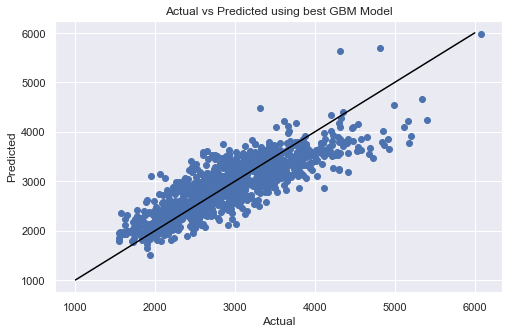

In [94]:
plt.scatter(Y_test,y_pred_test_GBM)
plt.title('Actual vs Predicted using best GBM Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot([1000, 6000],[1000,6000],'black')

##### Best Random Forest

In [95]:
y_pred_test_RF = Model_RF.predict(X_test)

In [96]:
print_regressor_scores(X_test,Y_test,y_pred_test_RF)

MAE for test set is 309.88082986461603
RMSE for test set is 400.22972209356163
R squared score for test set is 0.6708620228853517
Adjusted R squared score for testing set is 0.6683228678063573


{'MAE': 309.88082986461603,
 'RMSE': 400.22972209356163,
 'R2 Score': 0.6708620228853517,
 'Adjusted R2 Score': 0.6683228678063573}

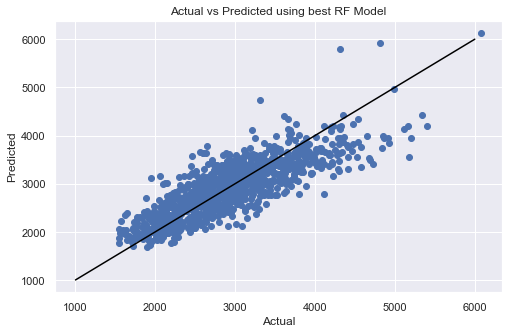

In [97]:
plt.scatter(Y_test,y_pred_test_RF)
plt.title('Actual vs Predicted using best RF Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot([1000, 6000],[1000,6000],'black')

The best model is considered to be the baseline GBM model based on it's performance metrics on test data.

### Running the model on Hold_Out data to determine claims amount

In [98]:
Hold_df = pd.read_csv('data_hold_out.csv')
Hold_df.head()

,id,vehicle_age,vehicle_value,vehicle_power,ph_age,licence_years,licence_points,ph_owns_home,annual_mileage
0,1,8,7899.0,89.0,48,19,3,0.0,2000
1,2,3,14950.0,116.0,43,15,0,0.0,7000
2,3,2,8894.0,69.0,63,20,3,1.0,6000
3,4,0,13352.0,76.0,53,16,0,1.0,12000
4,5,2,10063.0,81.0,43,14,3,0.0,10000


In [101]:
Null_cells_1 = Hold_df.isnull().sum() # Looking for null values
Null_cells_1

id                 0
vehicle_age        0
vehicle_value     16
vehicle_power     18
ph_age             0
licence_years      0
licence_points     0
ph_owns_home      23
annual_mileage     0
dtype: int64

In [102]:
Hold_df['vehicle_value'] = Hold_df['vehicle_value'].fillna(Hold_df['vehicle_value'].mean())

In [103]:
Hold_df['vehicle_power'] = Hold_df['vehicle_power'].fillna(Hold_df['vehicle_power'].mean())

In [104]:
Hold_df['ph_owns_home'] = Hold_df['ph_owns_home'].fillna(Hold_df['ph_owns_home'].mean())

In [105]:
X_holdOut = Hold_df.drop('id', axis = 1)

In [106]:
y_pred_holdout = Model_GBM.predict(X_holdOut)

In [108]:
target_hold = pd.DataFrame(y_pred_holdout, columns = ['Predictions'])
target_hold

,Predictions
0,2136.997825
1,3531.017940
2,1889.320527
3,2866.123624
4,3316.659200
...,...
1767,3519.361923
1768,2403.211644
1769,2571.108624
1770,1906.560766


In [109]:
import pandas
from IPython.display import FileLink
import os
target_hold.to_csv('Predictions.csv', index=False)

I have added the prediction values to the data_hold_out csv sheet with column name - Predictions.

### FUTURE WORK:

(1) Since the time limit was 4 hrs, I didn't try other algorithms. I beleive the accuracy of the predictions can be further improved by using algorithms like XGBoost and SVM.

(2) Bayesian Optimization can be used to tune the hyperparameters.

(3) Most time could have been invested on tuning the model accurately and that could have helped avoiding the baseline model as the best model